In [41]:
import our_gantt_chart as gc
import numpy as np
import pandas as pd
import datetime as dt


import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.text as text

%matplotlib notebook



In [2]:
data = gc.read_file("gantt_chart_data.csv")

In [25]:
print(data)

nicknames = []

events = {}

for event in data:

    nn = event[4].astype(str)
    name = event[0].astype(str)
    
    if nn == "":
        nn = name
    nicknames.append(nn)
    events[nn] = {}
    
    events[nn]["name"] = name
    
    date = event[1].astype(str)
    d = gc.is_date(date)
    print(d)
    start_from_other = False
    if d is False:
        d = date.split(":")[0]
        start_from_other = True

    events[nn]["start"] = d
    events[nn]["start_from_other"] = start_from_other

    date = event[2].astype(str)
    d = gc.is_date(date)
    print(d)
    
    events[nn]["end"] = d
    
    duration = event[3]
    if duration=='':
        duration = None
    else:
        duration = duration.astype(float)
    events[nn]["duration"] = duration

    
print(nicknames)
print(events)

[[b'Cut wood' b'1/1/2018' b'' b'2' b'cw' b'Workshop']
 [b'Attach peltiers' b'cw:1.0' b'' b'2' b'ap' b'Electronics']]
2018-01-01 00:00:00
False
False
False
['cw', 'ap']
{'cw': {'name': 'Cut wood', 'start': datetime.datetime(2018, 1, 1, 0, 0), 'start_from_other': False, 'end': False, 'duration': 2.0}, 'ap': {'name': 'Attach peltiers', 'start': 'cw', 'start_from_other': True, 'end': False, 'duration': 2.0}}


In [26]:
date = data[0][1].astype(str)
d = gc.is_date(date)
print(d)

2018-01-01 00:00:00


<IPython.core.display.Javascript object>


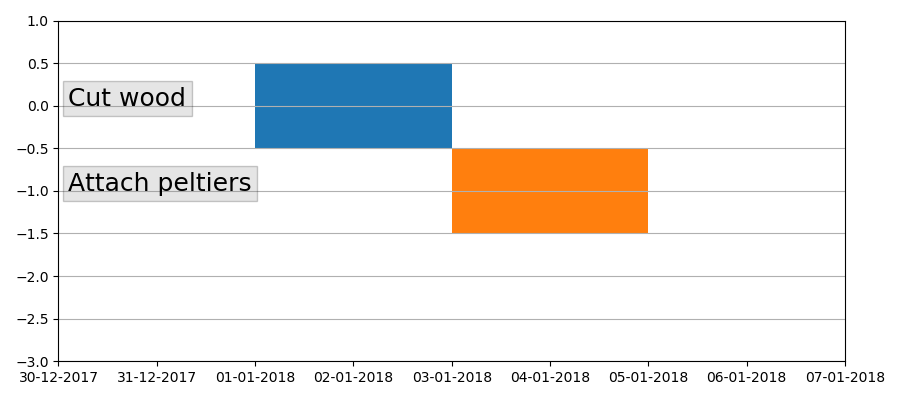

{'name': 'Cut wood', 'start': datetime.datetime(2018, 1, 1, 0, 0), 'start_from_other': False, 'end': False, 'duration': 2.0}
start:  2018-01-01 00:00:00
2.0
2018-01-01 00:00:00
{'name': 'Attach peltiers', 'start': 'cw', 'start_from_other': True, 'end': False, 'duration': 2.0}
start:  cw
HERE
HERE:  2018-01-03 00:00:00
2.0
2018-01-03 00:00:00
{'name': 'Cut wood', 'start': datetime.datetime(2018, 1, 1, 0, 0), 'start_from_other': False, 'end': False, 'duration': 2.0}
TEXT:  Cut wood (datetime.datetime(2017, 12, 30, 2, 24), 0)
{'name': 'Attach peltiers', 'start': 'cw', 'start_from_other': True, 'end': False, 'duration': 2.0}
TEXT:  Attach peltiers (datetime.datetime(2017, 12, 30, 2, 24), -1)
2017-12-30 00:00:00
2018-01-07 00:00:00


In [71]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


fig1 = plt.figure(figsize=(9,4))
#ax = fig1.add_subplot(111, aspect='equal')
ax = fig1.add_subplot(1,1,1)

ymax = 10000

datemin = dt.datetime(3000,1,1)
datemax = dt.datetime(1,1,1)

for i,key in enumerate(events.keys()):
    event = events[key]
    print(event)
    
    start = event["start"]
    print("start: ",start)
    if type(start) != dt.datetime:
        print("HERE")
        dependency = start
        start = events[dependency]["end"]
        if start is False:
            start = events[dependency]["start"] + dt.timedelta(days=events[dependency]["duration"])
        print("HERE: ",start)

    duration = event["duration"]
    if duration is None:
        duration = (event['end'] - start).days

    end = event["end"]
    if end is False:
        print(duration)
        print(start)
        end = start + dt.timedelta(days=duration)
                

    
    if start:
        if start<datemin:
            datemin = start
        if end>datemax:
            datemax = end

        ax.barh(-i, duration, 1, start, align='center',alpha=1.0)


#fig1.autofmt_xdate()
xfmt = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(xfmt)


datemin -= dt.timedelta(days=2)
datemax += dt.timedelta(days=2)

# Put the names
for i,key in enumerate(events.keys()):
    event = events[key]
    print(event)
    name = event["name"]
    
    y = -i
    x = datemin + dt.timedelta(days=0.1)
    print("TEXT: ",name,(x,y))
    
    plt.text(x,y,name,backgroundcolor='white',bbox=(dict(facecolor='gray', alpha=0.2)),fontsize=18)

print(datemin)
print(datemax)



ax.set_xlim(datemin, datemax)
ax.set_ylim(-len(events)-1,1)
ax.yaxis.label.set_visible(False)

ax.grid(axis='y')

plt.tight_layout()

In [19]:
a = dt.datetime(2017,1,1)
b = dt.datetime(2017,2,1)

c = b-a

In [20]:
c.days

31

In [34]:
len(events)

2

In [ ]:
text.Text